<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li></ul></div>

# Защита персональных данных клиентов

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.datasets import make_spd_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    data = pd.read_csv('/datasets/insurance.csv')
except:
    data = pd.read_csv('C:/Users/Mikhail/оформление/Защита персональных данных клиентов/insurance.csv')
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Пол - 0%
Возраст - 0%
Зарплата - 0%
Члены семьи - 0%
Страховые выплаты - 0%


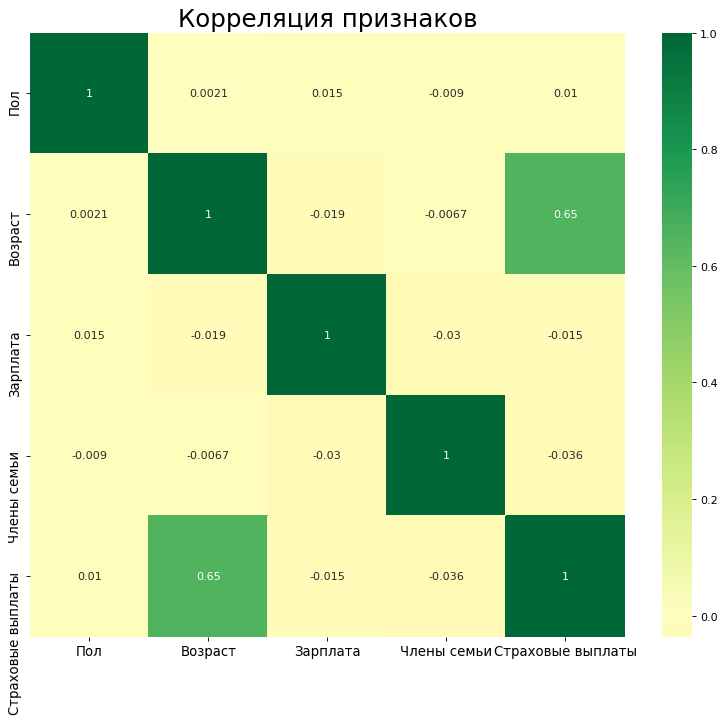

In [4]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, 
            yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Корреляция признаков', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Умножение матриц

**Свойства матриц:**
$$
1) AA^{-1} = A^{-1}A=E
$$
$$
2)(A^T)^{-1} = (A^{-1})^T
$$
$$
3)E^{-1} = E
$$
$$
4) (A^T)^T=A
$$
$$
5) AE = EA = A
$$

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$
$$
a = (X^T X)^{-1} X^T X y
$$


## Алгоритм преобразования

**Алгоритм**


$$
a' = (XP)w
$$

$$
w' = \arg\min_w MSE((XP)w, y)
$$

$$
w' = ((XP)^T (XP))^{-1} (XP)^T y
$$

$$
w' = (P^T X^T X P)^{-1} P^T X^T y
$$


**раскрывать скобки мы будет так (P^T| X^T X |P), т.к X^T X мы разделить не можем (рассказывали на консультации в Воскресенье)**


$$
w' = (P^T)^{-1} (X^T X)^{-1} P^{-1} P^T X^T y, P^T(P^T)^{-1} - сокращаем
$$
$$
w' = (X^T X)^{-1} P^{-1} X^T y => P^{-1} w
$$
$$
a' = X P P^{-1} w, AA^{-1} = A^{-1}A=E => P^{-1}P = E
$$
$$
a' = X w => (X^T X)^{-1} X^T X y
$$
$$
a = (X^T X)^{-1} X^T X y
$$
$$
a = a'
$$

$$a = a' $$

**Обоснование**

Произведем домножение на квадратную матрицу 4X4, 4X4 т.к число строк в матрице должно соответсвовать числу столбцов в матрице признаков, таким образом мы зашифруем признаки с помощью матрицного умножения.

## Проверка алгоритма

Если матрица необратима, будет обнаружена ошибка.

**Переделал**

In [5]:
def matrix (features):
    matrix = np.linalg.inv(make_spd_matrix(n_dim = 4, random_state=12345)) #обратная матрица 
    features_matrix = features @ matrix
    return features_matrix
# c помощью этой библиотеки будет создана случайная симметричная положительно определенная матрицы
# и мы точно не получим случай с необратимой матрицей

In [6]:
target = data['Страховые выплаты']
features = data.drop(['Страховые выплаты'] , axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(features, target, 
                                                                              test_size=0.25, random_state=12345)

In [7]:
features_train_matrix, features_valid_matrix, target_train_matrix, target_valid_matrix = train_test_split(matrix(features), target, 
                                                                              test_size=0.25, random_state=12345)
#Вставил функцию преобразования признаков в сплит, сразу сплитит полученное преобразование

In [8]:
scaler = StandardScaler().fit(features_train)

features_train_scale = scaler.transform(features_train)
features_valid_scale = scaler.transform(features_valid)
features_train_scale.shape, features_valid_scale.shape

((3750, 4), (1250, 4))

In [9]:
scaler = StandardScaler().fit(features_train_matrix)

features_train_scale_matrix = scaler.transform(features_train_matrix)
features_valid_scale_matrix = scaler.transform(features_valid_matrix)
features_train_scale.shape, features_valid_scale.shape

((3750, 4), (1250, 4))

###### До преобразования

In [10]:
model = LinearRegression().fit(features_train, target_train)
predict = model.predict(features_valid)
R2 = r2_score(target_valid, predict)
print(R2)

0.43522757127026546


In [11]:
model_scale = LinearRegression().fit(features_train_scale, target_train)
predict_scale = model_scale.predict(features_valid_scale)
R2_scale = r2_score(target_valid, predict_scale)
print(R2_scale)

0.4352275712702667


###### После преобразования

In [12]:
model_scale = LinearRegression().fit(features_train_matrix, target_train_matrix)
predict_scale = model_scale.predict(features_valid_matrix)
R2_scale = r2_score(target_valid_matrix, predict_scale)
print(R2_scale)

0.43522757127080836


In [13]:
model = LinearRegression().fit(features_train_matrix, target_train_matrix)
predict = model.predict(features_valid_matrix)
R2 = r2_score(target_valid, predict)
print(R2)

0.43522757127080836


Результаты до и после не отличаются, даже с применением маштабирования